*** 
<h2 align="center"> Click-Through Rate Prediction </h2>
<br>
<center><font size='3' color='#33AAFBD'> Keivan Mokhtarpour </font></center>


***

## `Initialization` <a name="read"></a>
We will import the required libraries for this notebook including **pandas**.

In [153]:
# Remove warnings
import warnings
warnings.filterwarnings("ignore")
# SQLAlchemy 
from sqlalchemy import create_engine
import pymysql
import configparser
# Mathetimatical Operations
import numpy as np
# Data manipulation
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter
# Sklearn
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Problem Solving Steps
- Data Collection
- Exploratory Data Analysis
- Data Cleaning
- Feature Engineering
- Model Training (including cross validation and hyperparameter tuning)
- Insights

## `Data Collection` <a name="read"></a>
Data can be collected through different ways. We can use SQLAlchemy to load the data directly from the database or simply use `pandas` to load it into our workspace. We investigate both here.

### `SQL Alchemy` 
We can connect to MySQL database using our credentials stored in a configuration file. These credentials include:
1. Database Type
2. Database Driver
3. Database User 
4. Database Password
5. Database Host
6. Database Port
7. Database Name

#### Configuration

In [ ]:
config = configparser.ConfigParser()
config.read('sql.ini')

In [ ]:
DB_TYPE = config['default']['DB_TYPE']
DB_DRIVER = config['default']['DB_DRIVER']
DB_USER = config['default']['DB_USER']
DB_PASS = config['default']['DB_PASS']
DB_HOST = config['default']['DB_HOST']
DB_PORT = config['default']['DB_PORT']
DB_NAME = config['default']['DB_NAME']

In [ ]:
SQLALCHEMY_DATABASE_URI = f'{DB_TYPE}+{DB_DRIVER}://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}'

# Creating engine with login info
engine = create_engine(SQLALCHEMY_DATABASE_URI)
print(engine)
# this connects to the sql engine
con = engine.connect()

#### Retrieving the DataFrame from MySQL

In [ ]:
df = con.execute('''
    SELECT * 
    FROM ctr.ctrdata;
''').fetchall()

#### Using SQL Alchemy with Pandas

In [ ]:
import pandas as pd

df = pd.read_sql('''
    SELECT * 
    FROM ctr.ctrdata;
''',con=con)

df

### `Pandas` 

In [154]:
df = pd.read_csv('ctrdata.csv')

In [155]:
df

,Unnamed: 0,maid_transactions,payment_time_transactions,money,kind_Pay,kind_Card,mid_transactions,network,industry,sex,...,payment_time_views,maid_views,mid_views,ad_id_tvca,click_time,payment_time,maid,mid,ad_id_clicks,clicked
0,2017-08-01 00:00:01AoL98D,AoL98D,2017-08-01 00:00:01,300,4JBo,DEBIT,r0g7,3g+,1203,male,...,2017-08-01 00:00:01,AoL98D,r0g7,a98n,NaN,NaN,NaN,NaN,NaN,0
1,2017-08-01 00:00:01Y1WM51,Y1WM51,2017-08-01 00:00:01,26400,4JBo,DEBIT,0G76,3g+,1000,female,...,2017-08-01 00:00:01,Y1WM51,0G76,zjPY,NaN,NaN,NaN,NaN,NaN,0
2,2017-08-01 00:00:01Y1WM51,Y1WM51,2017-08-01 00:00:01,26400,4JBo,DEBIT,0G76,3g+,1000,female,...,2017-08-01 00:00:01,Y1WM51,0G76,apjA,NaN,NaN,NaN,NaN,NaN,0
3,2017-08-01 00:00:01k0oJAA,k0oJAA,2017-08-01 00:00:01,800,4JBo,DEBIT,K10o,unknown,1000,male,...,2017-08-01 00:00:01,k0oJAA,K10o,zmAg,NaN,NaN,NaN,NaN,NaN,0
4,2017-08-01 00:00:01k0oJAA,k0oJAA,2017-08-01 00:00:01,800,4JBo,DEBIT,K10o,unknown,1000,male,...,2017-08-01 00:00:01,k0oJAA,K10o,apjA,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134540,2017-08-01 23:59:59WVEgAo,WVEgAo,2017-08-01 23:59:59,1000,zO8g,CREDIT,BYle,unknown,1225,male,...,2017-08-01 23:59:59,WVEgAo,BYle,zV3w,2017-08-02 00:00:07,2017-08-01 23:59:59,WVEgAo,BYle,zV3w,1
1134541,2017-08-01 23:59:59qlgYYx,qlgYYx,2017-08-01 23:59:59,350,4JBo,DEBIT,X180A,4g,1204,male,...,2017-08-01 23:59:59,qlgYYx,X180A,apjA,NaN,NaN,NaN,NaN,NaN,0
1134542,2017-08-02 00:00:005AORbZ,5AORbZ,2017-08-02 00:00:00,2000,4JBo,DEBIT,l50r,4g,1000,male,...,2017-08-02 00:00:00,5AORbZ,l50r,apjA,2017-08-02 00:00:06,2017-08-02 00:00:00,5AORbZ,l50r,apjA,1
1134543,2017-08-02 00:00:00J0RL,J0RL,2017-08-02 00:00:00,350,4JBo,CREDIT,lKXO,2g,1203,male,...,2017-08-02 00:00:00,J0RL,lKXO,zmAg,NaN,NaN,NaN,NaN,NaN,0


As you may see above, each record in the dataframe refers to an impression. There could be multiple impressions regarding a specific transaction. That's why we'll later survey the data based on transactions using unique user ID and payment time. Let's take a quick look at the dataframe first.

#### Total Number of Impressions

In [156]:
print(df.shape[0])

1134545


#### General information about different columns

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134545 entries, 0 to 1134544
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Unnamed: 0                 1134545 non-null  object
 1   maid_transactions          1134545 non-null  object
 2   payment_time_transactions  1134545 non-null  object
 3   money                      1134545 non-null  int64 
 4   kind_Pay                   1134545 non-null  object
 5   kind_Card                  1134545 non-null  object
 6   mid_transactions           1134545 non-null  object
 7   network                    1134545 non-null  object
 8   industry                   1134545 non-null  int64 
 9   sex                        1134491 non-null  object
 10  adr                        1126566 non-null  object
 11  view_time                  1134545 non-null  object
 12  payment_time_views         1134545 non-null  object
 13  maid_views                 

#### Observation:
- click_time, payment_time, maid, mid, ad_id_clicks, sex  and adr contain null values.
- There are 3 integer type and 19 object type features.

# `Exploratory Data Analysis`

#### Statistical info of numerical features

In [158]:
df.drop(['clicked'],axis=1).describe()

,money,industry
count,1.134545e+06,1.134545e+06
mean,3.470778e+03,1.058766e+03
std,2.309998e+04,1.545693e+02
min,1.000000e+00,0.000000e+00
25%,7.500000e+02,1.000000e+03
50%,1.400000e+03,1.000000e+03
75%,2.400000e+03,1.203000e+03
max,1.883755e+06,1.405000e+03


#### Observation:
1. There is notably a large difference between 75th %tile and max values of the 'money' column.
2. Median value of 'money', 'industry' is lower than mean
3. Thus observation 1 and 2 suggest there are lot of outliers in the data specially for the 'money' column.

### Distribution of impressions lead to a click and those who did not

Number of customers who did not click: 955829
Number of customers who clicked: 178716
Percentage of customers that clicked to those who did not click: 5.35 %


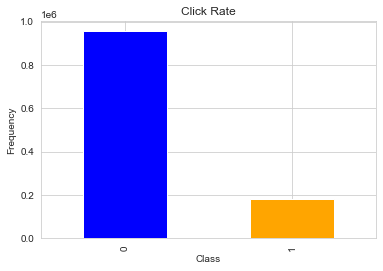

In [159]:
count_classes = pd.value_counts(df['clicked'], sort = True)
colors = ['blue', 'orange']
count_classes.plot(kind = 'bar', color=colors)
plt.title("Click Rate")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency");
print('Number of customers who did not click:',df['clicked'].value_counts()[0])
print('Number of customers who clicked:',df['clicked'].value_counts()[1])
print('Percentage of customers that clicked to those who did not click:',round(df['clicked'].value_counts()[0]/df['clicked'].value_counts()[1],2),'%')

### Observation:
- The data is imbalanced and so we might have to use techniques like resmapling (undersampling or oversampling) or use metrics like AUC-ROC curve or AUPRC or SMOTE to handle imbalanced data. Lets explore further which will help us decide what technique should we use.

### Correlation between numerical features

<AxesSubplot:>

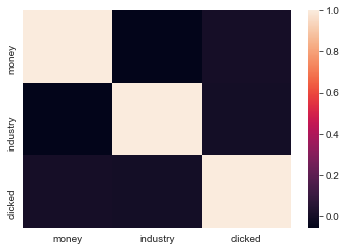

In [160]:
sns.heatmap(df.corr())

#### Observation:
Features are not highly correlated.

### Features Distributions

### `kind_Pay` 

<AxesSubplot:>

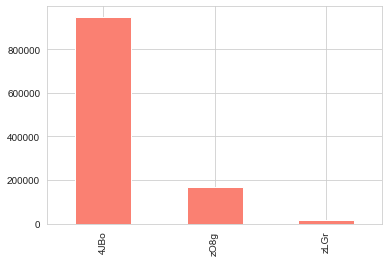

In [161]:
df['kind_Pay'].value_counts().plot(kind='bar', color="salmon")

### `kind_Card` 

<AxesSubplot:>

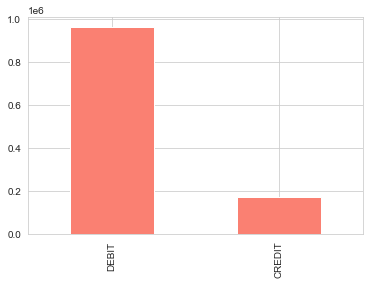

In [162]:
df['kind_Card'].value_counts().plot(kind='bar', color="salmon")

### `Network` 

<AxesSubplot:>

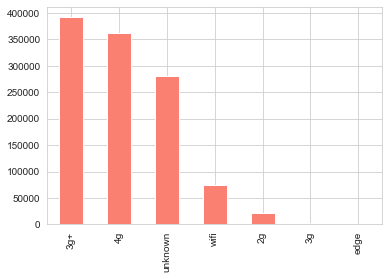

In [163]:
df['network'].value_counts().plot(kind='bar', color="salmon")

### `Industry` 

<AxesSubplot:>

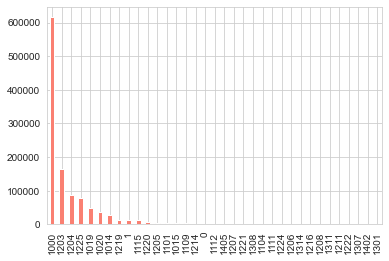

In [164]:
df['industry'].value_counts().plot(kind='bar', color="salmon")

### `Sex` 

<AxesSubplot:>

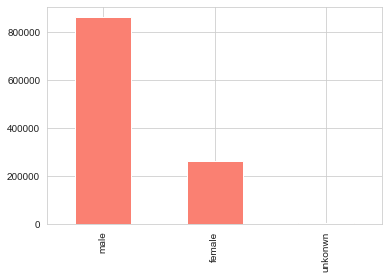

In [165]:
df['sex'].value_counts().plot(kind='bar', color="salmon")

## `Ad ID`

<AxesSubplot:>

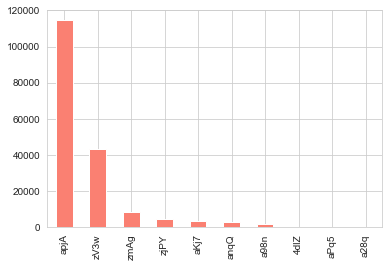

In [166]:
df['ad_id_clicks'].value_counts().plot(kind = 'bar', color="salmon")

## `CTR Calculation`

Click Through Rate (CTR) could be calculated by finding the portion percentage of the clicked to non-clicked impressions.

### `kind_Pay`

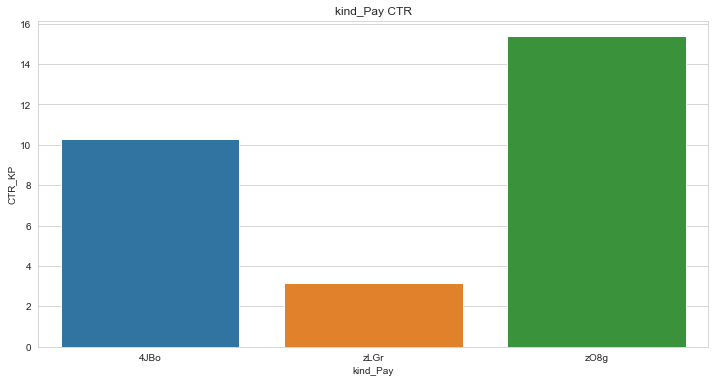

In [235]:
df_click = df[df['clicked'] == 1]
df_kindpay = df[['kind_Pay','clicked']].groupby(['kind_Pay']).count().reset_index()
df_kindpay = df_kindpay.rename(columns={'clicked': 'impressions'})
df_kindpay['clicks'] = df_click[['kind_Pay','clicked']].groupby(['kind_Pay']).count().reset_index()['clicked']
df_kindpay['CTR_KP'] = df_kindpay['clicks']/df_kindpay['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR_KP', x='kind_Pay', data=df_kindpay)
plt.title('kind_Pay CTR');

### `kind_Card`

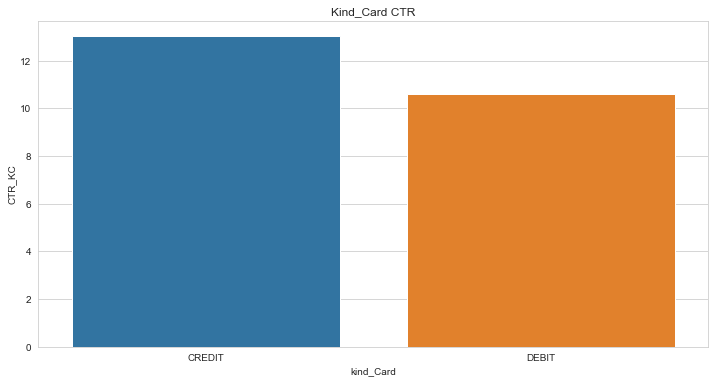

In [236]:
###Calculating CTR based on the 'kind_card'
df_click = df[df['clicked'] == 1]
df_kindcard = df[['kind_Card','clicked']].groupby(['kind_Card']).count().reset_index()
df_kindcard = df_kindcard.rename(columns={'clicked': 'impressions'})
df_kindcard['clicks'] = df_click[['kind_Card','clicked']].groupby(['kind_Card']).count().reset_index()['clicked']
df_kindcard['CTR_KC'] = df_kindcard['clicks']/df_kindcard['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR_KC', x='kind_Card', data=df_kindcard)
plt.title('Kind_Card CTR');

# `Data Cleaning`


We will do some EDA again after cleaning our data and engineering the features.

### Dropping Duplicates 
Some records have been duplicated throughout the database.

In [167]:
print(df.shape)
df = df.drop_duplicates(keep = 'first') # Drop duplicates except for the first occurrence.
df.shape

(1134545, 22)


(1123016, 22)

### Check the null values

- To handle missing values, there are various techniques:
   Listwise deletion, Recover the values, Educated guessing, Average Imputation,
   Common Point imputation, Regression Substitution, Multiple Imputation
   
- We deal with handling missing values based on the dataset and domain knowledge.  
  the null values here. 

In [168]:
df.isnull().sum()

Unnamed: 0                        0
maid_transactions                 0
payment_time_transactions         0
money                             0
kind_Pay                          0
kind_Card                         0
mid_transactions                  0
network                           0
industry                          0
sex                              54
adr                            7918
view_time                         0
payment_time_views                0
maid_views                        0
mid_views                         0
ad_id_tvca                        0
click_time                   955814
payment_time                 955814
maid                         955814
mid                          955814
ad_id_clicks                 955814
clicked                           0
dtype: int64

### `Gender`

In [169]:
df['sex'].value_counts().head()

male       852177
female     263124
unkonwn      7661
Name: sex, dtype: int64

In [170]:
df['sex'] = df['sex'].replace({'unkonwn': 'unknown'}) # Renaming Features 

In [171]:
df['sex'].fillna('unknown', inplace = True) # Filling Nulls with `unknown`

In [172]:
df['sex'].value_counts().head()

male       852177
female     263124
unknown      7715
Name: sex, dtype: int64

### `Address`

In [173]:
df['adr'].value_counts().head()

朝阳区望京东路4号院                       4916
南阳市长江东路                          4450
北京市丰台区莲花池东路116-2                 2786
北京丰台永辉超市二层美食城                    1789
朝阳区酒仙桥路12号1号楼LJ02-73-74-75-76    1507
Name: adr, dtype: int64

In [174]:
df['adr'].fillna('unknown', inplace = True)

In [175]:
df['adr'].value_counts().head()

unknown             7918
朝阳区望京东路4号院          4916
南阳市长江东路             4450
北京市丰台区莲花池东路116-2    2786
北京丰台永辉超市二层美食城       1789
Name: adr, dtype: int64

### `Click Time`

In [176]:
df['click_time'].value_counts().head(10)

2017-08-01 12:21:13    23
2017-08-01 18:53:40    22
2017-08-01 12:17:05    21
2017-08-01 18:44:50    21
2017-08-01 18:37:58    21
2017-08-01 18:53:39    20
2017-08-01 19:19:32    20
2017-08-01 12:10:12    19
2017-08-01 22:17:36    19
2017-08-01 22:17:38    19
Name: click_time, dtype: int64

### `Ad ID`

In [177]:
df['ad_id_tvca'].value_counts()

apjA    481355
zV3w    157536
zmAg    123214
a98n    108728
anqQ     98044
aKj7     78490
zjPY     74998
4dlZ       334
4vmr       296
aPq5         6
zrVd         4
zQBB         3
agr5         2
a28q         2
yMQJ         2
zm5g         1
z08K         1
Name: ad_id_tvca, dtype: int64

### `Feature Selection` 

- Let's take a look at the dataset columns again:

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123016 entries, 0 to 1134544
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Unnamed: 0                 1123016 non-null  object
 1   maid_transactions          1123016 non-null  object
 2   payment_time_transactions  1123016 non-null  object
 3   money                      1123016 non-null  int64 
 4   kind_Pay                   1123016 non-null  object
 5   kind_Card                  1123016 non-null  object
 6   mid_transactions           1123016 non-null  object
 7   network                    1123016 non-null  object
 8   industry                   1123016 non-null  int64 
 9   sex                        1123016 non-null  object
 10  adr                        1123016 non-null  object
 11  view_time                  1123016 non-null  object
 12  payment_time_views         1123016 non-null  object
 13  maid_views                 

#### Domain Knowledge

- In order to design our dataset, we consider each impression as a record. It is vivid that some columns have no contributions to the click prediction target.

`Unnamed: 0`: has no contribution, we drop it.

`maid_transactions`: customer ID is not relevant here. We drop it.

`payment_time_transactions`: Payment time may have effect as the customer behaviour is volatile to different hours. we will convert it to the hour of payment for each transaction.

`money`: could be important as a numeric variable.

`kind_Pay`: payment method could be a feature.

`kind_Card`: Card type (`Debit` or `Credit`) could be an important feature.

`mid_transactions`: `store ID` is not pertaining to the problem target.

`network`: Network class (`2g`, `3g`, `4g`, etc.) could be a game changer in the customers' behaviour.

`industry`: the industry pertaining to the commodities ordered by the customers could be a relevant feature. we keep it for now.

`sex`: customer gender is surely an important feature as women's preferences are different from men's preferences. 

`adr`: Store address could be relevant, but we lack further information about the geodata of stores and there are multiple categories making it a challenging feature to be used. So we drop it.

`view_time`: View time may have effect as the customer behaviour is volatile to different hours. we will convert it to the hour of view for each transaction.

`payment_time_views`: Not Applicable. We drop it.

`maid_views`: Not Applicable. We drop it.

`mid_views`: Not Applicable. We drop it.

`ad_id_tvca`: Ad ID could be important as people react better to engaging ads.

`click_time`: Not Applicable here. we have no information in advance about this. Our target is to predict click_time based on previous payment and view data. We drop it.

`payment_time`: Not Applicable. We drop it.

`maid`: Not Applicable. We drop it.

`mid`: Not Applicable. We drop it.

`ad_id_clicks`: Not Applicable. We drop it.

`clicked`: Target variable to be used.

In [179]:
df = df.drop(columns=['Unnamed: 0','payment_time_views','adr'
                ,'maid_views','mid_views','click_time',
                'payment_time','maid','mid','ad_id_clicks'])

In [180]:
df

,maid_transactions,payment_time_transactions,money,kind_Pay,kind_Card,mid_transactions,network,industry,sex,view_time,ad_id_tvca,clicked
0,AoL98D,2017-08-01 00:00:01,300,4JBo,DEBIT,r0g7,3g+,1203,male,2017-08-01 00:00:20,a98n,0
1,Y1WM51,2017-08-01 00:00:01,26400,4JBo,DEBIT,0G76,3g+,1000,female,2017-08-01 00:00:04,zjPY,0
2,Y1WM51,2017-08-01 00:00:01,26400,4JBo,DEBIT,0G76,3g+,1000,female,2017-08-01 00:00:06,apjA,0
3,k0oJAA,2017-08-01 00:00:01,800,4JBo,DEBIT,K10o,unknown,1000,male,2017-08-01 00:00:04,zmAg,0
4,k0oJAA,2017-08-01 00:00:01,800,4JBo,DEBIT,K10o,unknown,1000,male,2017-08-01 00:00:07,apjA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1134540,WVEgAo,2017-08-01 23:59:59,1000,zO8g,CREDIT,BYle,unknown,1225,male,2017-08-02 00:00:05,zV3w,1
1134541,qlgYYx,2017-08-01 23:59:59,350,4JBo,DEBIT,X180A,4g,1204,male,2017-08-02 00:00:03,apjA,0
1134542,5AORbZ,2017-08-02 00:00:00,2000,4JBo,DEBIT,l50r,4g,1000,male,2017-08-02 00:00:03,apjA,1
1134543,J0RL,2017-08-02 00:00:00,350,4JBo,CREDIT,lKXO,2g,1203,male,2017-08-02 00:00:02,zmAg,0


## Click Scenarios
Based on the dataframe, there might happen different click scenarios as below:

- Payment 
- Payment, View 
- Payment, View, View 
- Payment, View, Click
- Payment, View, Wait, Click
- Payment, View, View, View, Click (or there may be as many as views between the payment and click)

Based on these scenarios, we can define new features to cover them.
1. As our target is the click prediction, we can use `payment_time_transactions` and `view_time`.
2. We can extract hour data of payments and views as it is volatile to hourly changes.
3. We can calculate the number of views by filtering down the impressions uniqued by the user ID and payment time specific to each transaction. 

### Transaction based GroupBy

In [181]:
df.groupby(['maid_transactions', 'payment_time_transactions'], group_keys=False).count().reset_index()['clicked']

0         1
1         2
2         1
3         1
4         1
         ..
924377    1
924378    1
924379    1
924380    2
924381    1
Name: clicked, Length: 924382, dtype: int64

### Number of view counts for each transaction

In [182]:
view_counts = df.groupby(['maid_transactions', 'payment_time_transactions'], group_keys=False).count().reset_index()['clicked']

In [183]:
view_counts

0         1
1         2
2         1
3         1
4         1
         ..
924377    1
924378    1
924379    1
924380    2
924381    1
Name: clicked, Length: 924382, dtype: int64

#### Keeping the last impression of each transaction 

In [184]:
df.drop_duplicates(subset=['maid_transactions', 'payment_time_transactions'], keep="last").reset_index()

,index,maid_transactions,payment_time_transactions,money,kind_Pay,kind_Card,mid_transactions,network,industry,sex,view_time,ad_id_tvca,clicked
0,0,AoL98D,2017-08-01 00:00:01,300,4JBo,DEBIT,r0g7,3g+,1203,male,2017-08-01 00:00:20,a98n,0
1,2,Y1WM51,2017-08-01 00:00:01,26400,4JBo,DEBIT,0G76,3g+,1000,female,2017-08-01 00:00:06,apjA,0
2,4,k0oJAA,2017-08-01 00:00:01,800,4JBo,DEBIT,K10o,unknown,1000,male,2017-08-01 00:00:07,apjA,0
3,5,n3N72D,2017-08-01 00:00:01,1200,4JBo,DEBIT,9PO1,unknown,1000,male,2017-08-01 00:01:39,a98n,0
4,7,9NDrlQ,2017-08-01 00:00:02,11000,4JBo,DEBIT,X1KAP,4g,1019,male,2017-08-01 00:00:16,zmAg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924377,1134540,WVEgAo,2017-08-01 23:59:59,1000,zO8g,CREDIT,BYle,unknown,1225,male,2017-08-02 00:00:05,zV3w,1
924378,1134541,qlgYYx,2017-08-01 23:59:59,350,4JBo,DEBIT,X180A,4g,1204,male,2017-08-02 00:00:03,apjA,0
924379,1134542,5AORbZ,2017-08-02 00:00:00,2000,4JBo,DEBIT,l50r,4g,1000,male,2017-08-02 00:00:03,apjA,1
924380,1134543,J0RL,2017-08-02 00:00:00,350,4JBo,CREDIT,lKXO,2g,1203,male,2017-08-02 00:00:02,zmAg,0


In [185]:
df = df.drop_duplicates(subset=['maid_transactions', 'payment_time_transactions'], keep="last").reset_index()

### Adding the new column `view_count`

In [186]:
df['view_counts'] = view_counts

In [187]:
df

,index,maid_transactions,payment_time_transactions,money,kind_Pay,kind_Card,mid_transactions,network,industry,sex,view_time,ad_id_tvca,clicked,view_counts
0,0,AoL98D,2017-08-01 00:00:01,300,4JBo,DEBIT,r0g7,3g+,1203,male,2017-08-01 00:00:20,a98n,0,1
1,2,Y1WM51,2017-08-01 00:00:01,26400,4JBo,DEBIT,0G76,3g+,1000,female,2017-08-01 00:00:06,apjA,0,2
2,4,k0oJAA,2017-08-01 00:00:01,800,4JBo,DEBIT,K10o,unknown,1000,male,2017-08-01 00:00:07,apjA,0,1
3,5,n3N72D,2017-08-01 00:00:01,1200,4JBo,DEBIT,9PO1,unknown,1000,male,2017-08-01 00:01:39,a98n,0,1
4,7,9NDrlQ,2017-08-01 00:00:02,11000,4JBo,DEBIT,X1KAP,4g,1019,male,2017-08-01 00:00:16,zmAg,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924377,1134540,WVEgAo,2017-08-01 23:59:59,1000,zO8g,CREDIT,BYle,unknown,1225,male,2017-08-02 00:00:05,zV3w,1,1
924378,1134541,qlgYYx,2017-08-01 23:59:59,350,4JBo,DEBIT,X180A,4g,1204,male,2017-08-02 00:00:03,apjA,0,1
924379,1134542,5AORbZ,2017-08-02 00:00:00,2000,4JBo,DEBIT,l50r,4g,1000,male,2017-08-02 00:00:03,apjA,1,1
924380,1134543,J0RL,2017-08-02 00:00:00,350,4JBo,CREDIT,lKXO,2g,1203,male,2017-08-02 00:00:02,zmAg,0,2


Now that we have added the number of impressions for each transaction, we can remove out irrelevant features. We use value_counts for the classes inside each feature.

### `index`, `maid_transactions`, `mid_transactions`

In [188]:
df = df.drop(columns=['index','maid_transactions','mid_transactions']) ## irrelevant features

### `Network`

In [189]:
df['network'].value_counts().head(10) ## checking out the network column, it could be a useful feature.

3g+        322059
4g         283311
unknown    240574
wifi        58474
2g          17221
3g           2724
edge           19
Name: network, dtype: int64

### `Industry`

In [190]:
df['industry'].value_counts()  ## So many features makes the model complex, we drop it !!                 

1000    501979
1203    134822
1204     72068
1225     63380
1019     40239
1020     31627
1014     23131
1219     10684
1115     10669
1        10391
1220      4931
1205      3246
1101      3007
1015      2500
1109      2042
1214      1365
0         1254
1112       913
1405       868
1207       839
1221       590
1308       520
1111       398
1104       393
1224       371
1314       361
1206       350
1216       341
1311       251
1211       225
1222       213
1208       196
1307       106
1402       100
1301        12
Name: industry, dtype: int64

In [191]:
df = df.drop(columns=['industry'])

### `Sex`

In [192]:
df['sex'].value_counts()

male       726796
female     191961
unknown      5625
Name: sex, dtype: int64

### `Ad ID`

In [193]:
df['ad_id_tvca'].value_counts()

apjA    441767
zV3w    145781
a98n    106760
anqQ     96267
aKj7     76167
zmAg     35574
zjPY     21704
4vmr       282
4dlZ        63
aPq5         5
zrVd         3
a28q         2
agr5         2
zQBB         2
zm5g         1
z08K         1
yMQJ         1
Name: ad_id_tvca, dtype: int64

In [194]:
df = df.drop(columns=['ad_id_tvca'])

Now, we have 3 integer plus 6 object type features.

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924382 entries, 0 to 924381
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   payment_time_transactions  924382 non-null  object
 1   money                      924382 non-null  int64 
 2   kind_Pay                   924382 non-null  object
 3   kind_Card                  924382 non-null  object
 4   network                    924382 non-null  object
 5   sex                        924382 non-null  object
 6   view_time                  924382 non-null  object
 7   clicked                    924382 non-null  int64 
 8   view_counts                924382 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 63.5+ MB


### `Datetime` Type Features
In order to work with time features and subtracting `payment_time_transactions` and `view_time` data, we should convert them to `datetime`.

In [196]:
df['payment_time_hour']= pd.to_datetime(df['payment_time_transactions'])
df['view_time_hour']= pd.to_datetime(df['view_time'])

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924382 entries, 0 to 924381
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   payment_time_transactions  924382 non-null  object        
 1   money                      924382 non-null  int64         
 2   kind_Pay                   924382 non-null  object        
 3   kind_Card                  924382 non-null  object        
 4   network                    924382 non-null  object        
 5   sex                        924382 non-null  object        
 6   view_time                  924382 non-null  object        
 7   clicked                    924382 non-null  int64         
 8   view_counts                924382 non-null  int64         
 9   payment_time_hour          924382 non-null  datetime64[ns]
 10  view_time_hour             924382 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(6)
memory usa

## `payment-to-view-seconds`
This new column is the time distance between the payment and the last impression of each specific transaction. As you remember, we have previously removed out all impression except the last one for every transaction.

In [199]:
df['payment-to-view-seconds'] = df.apply(lambda row : round((row['view_time_hour'] - row['payment_time_hour']).total_seconds()), axis = 1)

Now, let's take a look at the data distributions. It is seen that the time differences range between -12 and 749449 seconds. A negative time difference does not make sense here since we assume a view to happen after the payment is received.

In [200]:
df.drop(['clicked'],axis=1).describe()

,money,view_counts,payment-to-view-seconds
count,9.243820e+05,924382.000000,924382.000000
mean,3.417564e+03,1.214883,242.073606
std,2.285859e+04,0.605512,4333.109521
min,1.000000e+00,1.000000,-12.000000
25%,7.000000e+02,1.000000,4.000000
50%,1.400000e+03,1.000000,10.000000
75%,2.350000e+03,1.000000,35.000000
max,1.883755e+06,182.000000,749449.000000


We can check the negative time differences, get the indices and remove them out from the dataframe.

In [201]:
df[df["payment-to-view-seconds"] < 0]

,payment_time_transactions,money,kind_Pay,kind_Card,network,sex,view_time,clicked,view_counts,payment_time_hour,view_time_hour,payment-to-view-seconds
258307,2017-08-01 12:08:20,500,4JBo,DEBIT,unknown,male,2017-08-01 12:08:16,0,2,2017-08-01 12:08:20,2017-08-01 12:08:16,-4
342666,2017-08-01 12:46:39,500,4JBo,DEBIT,4g,male,2017-08-01 12:46:35,0,1,2017-08-01 12:46:39,2017-08-01 12:46:35,-4
467904,2017-08-01 15:39:36,1960,4JBo,CREDIT,4g,male,2017-08-01 15:39:24,0,1,2017-08-01 15:39:36,2017-08-01 15:39:24,-12
900765,2017-08-01 22:46:55,1500,4JBo,DEBIT,4g,male,2017-08-01 22:46:51,0,1,2017-08-01 22:46:55,2017-08-01 22:46:51,-4


In [202]:
df[df["payment-to-view-seconds"] < 0].index

Int64Index([258307, 342666, 467904, 900765], dtype='int64')

In [203]:
df = df.drop(df[df["payment-to-view-seconds"] < 0].index).reset_index()
df

,index,payment_time_transactions,money,kind_Pay,kind_Card,network,sex,view_time,clicked,view_counts,payment_time_hour,view_time_hour,payment-to-view-seconds
0,0,2017-08-01 00:00:01,300,4JBo,DEBIT,3g+,male,2017-08-01 00:00:20,0,1,2017-08-01 00:00:01,2017-08-01 00:00:20,19
1,1,2017-08-01 00:00:01,26400,4JBo,DEBIT,3g+,female,2017-08-01 00:00:06,0,2,2017-08-01 00:00:01,2017-08-01 00:00:06,5
2,2,2017-08-01 00:00:01,800,4JBo,DEBIT,unknown,male,2017-08-01 00:00:07,0,1,2017-08-01 00:00:01,2017-08-01 00:00:07,6
3,3,2017-08-01 00:00:01,1200,4JBo,DEBIT,unknown,male,2017-08-01 00:01:39,0,1,2017-08-01 00:00:01,2017-08-01 00:01:39,98
4,4,2017-08-01 00:00:02,11000,4JBo,DEBIT,4g,male,2017-08-01 00:00:16,0,1,2017-08-01 00:00:02,2017-08-01 00:00:16,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924373,924377,2017-08-01 23:59:59,1000,zO8g,CREDIT,unknown,male,2017-08-02 00:00:05,1,1,2017-08-01 23:59:59,2017-08-02 00:00:05,6
924374,924378,2017-08-01 23:59:59,350,4JBo,DEBIT,4g,male,2017-08-02 00:00:03,0,1,2017-08-01 23:59:59,2017-08-02 00:00:03,4
924375,924379,2017-08-02 00:00:00,2000,4JBo,DEBIT,4g,male,2017-08-02 00:00:03,1,1,2017-08-02 00:00:00,2017-08-02 00:00:03,3
924376,924380,2017-08-02 00:00:00,350,4JBo,CREDIT,2g,male,2017-08-02 00:00:02,0,2,2017-08-02 00:00:00,2017-08-02 00:00:02,2


Now, we have positive time differenced transactions.

In [204]:
df.describe()

,index,money,clicked,view_counts,payment-to-view-seconds
count,924378.000000,9.243780e+05,924378.000000,924378.000000,924378.000000
mean,462190.369231,3.417574e+03,0.109661,1.214883,242.074679
std,266846.316779,2.285864e+04,0.312467,0.605512,4333.118865
min,0.000000,1.000000e+00,0.000000,1.000000,0.000000
25%,231094.250000,7.000000e+02,0.000000,1.000000,4.000000
50%,462190.500000,1.400000e+03,0.000000,1.000000,10.000000
75%,693285.750000,2.350000e+03,0.000000,1.000000,35.000000
max,924381.000000,1.883755e+06,1.000000,182.000000,749449.000000


Despite creating the `payment-to-view-seconds` column, we should check it for the outliers detection. This is also the case for other numerical features.

### Checking Outliers

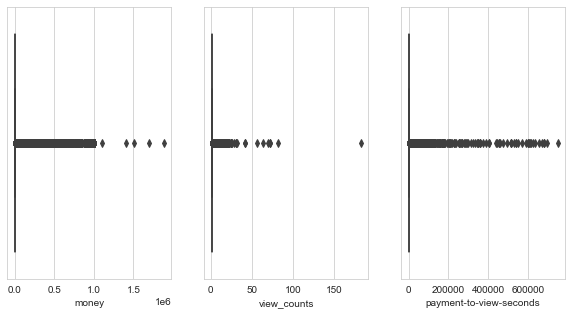

In [205]:
#Check outlier
fig, axarr = plt.subplots(1, 3, figsize=(10, 5))
cols = ['money', 'view_counts','payment-to-view-seconds']
for i in cols:
    index = cols.index(i)
    plt.subplot(1,3,index + 1)
    sns.boxplot(df[i])

As you may see, there are many outliers for each numerical column. We can handle these outliers by mapping the outliers to the upper and lower bounds of the distribution which we define below.

In [206]:
#Handling outlier
Q1 = (df[['money', 'view_counts','payment-to-view-seconds']]).quantile(0.25)
Q3 = (df[['money', 'view_counts','payment-to-view-seconds']]).quantile(0.75)

IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q3 - (1.5*IQR)

more_than = (df[['money', 'view_counts','payment-to-view-seconds']] > maximum)
lower_than = (df[['money', 'view_counts','payment-to-view-seconds']] < minimum)

df[['money', 'view_counts','payment-to-view-seconds']] = df[['money', 'view_counts','payment-to-view-seconds']].mask(more_than, maximum, axis=1)
df[['money', 'view_counts','payment-to-view-seconds']] = df[['money', 'view_counts','payment-to-view-seconds']].mask(lower_than, minimum, axis=1)

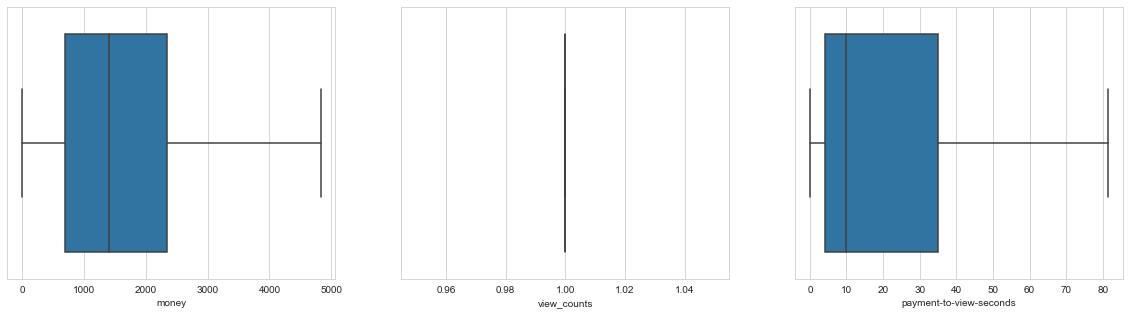

In [207]:
fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
cols = ['money', 'view_counts', 'payment-to-view-seconds']
for i in cols:
    index = cols.index(i)
    plt.subplot(1,3,index + 1)
    sns.boxplot(df[i])

In [208]:
df.describe()

,index,money,clicked,view_counts,payment-to-view-seconds
count,924378.000000,924378.000000,924378.000000,924378.0,924378.000000
mean,462190.369231,1758.503907,0.109661,1.0,24.278100
std,266846.316779,1369.715890,0.312467,0.0,27.704176
min,0.000000,1.000000,0.000000,1.0,0.000000
25%,231094.250000,700.000000,0.000000,1.0,4.000000
50%,462190.500000,1400.000000,0.000000,1.0,10.000000
75%,693285.750000,2350.000000,0.000000,1.0,35.000000
max,924381.000000,4825.000000,1.000000,1.0,81.500000


In [209]:
df

,index,payment_time_transactions,money,kind_Pay,kind_Card,network,sex,view_time,clicked,view_counts,payment_time_hour,view_time_hour,payment-to-view-seconds
0,0,2017-08-01 00:00:01,300,4JBo,DEBIT,3g+,male,2017-08-01 00:00:20,0,1,2017-08-01 00:00:01,2017-08-01 00:00:20,19.0
1,1,2017-08-01 00:00:01,4825,4JBo,DEBIT,3g+,female,2017-08-01 00:00:06,0,1,2017-08-01 00:00:01,2017-08-01 00:00:06,5.0
2,2,2017-08-01 00:00:01,800,4JBo,DEBIT,unknown,male,2017-08-01 00:00:07,0,1,2017-08-01 00:00:01,2017-08-01 00:00:07,6.0
3,3,2017-08-01 00:00:01,1200,4JBo,DEBIT,unknown,male,2017-08-01 00:01:39,0,1,2017-08-01 00:00:01,2017-08-01 00:01:39,81.5
4,4,2017-08-01 00:00:02,4825,4JBo,DEBIT,4g,male,2017-08-01 00:00:16,0,1,2017-08-01 00:00:02,2017-08-01 00:00:16,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924373,924377,2017-08-01 23:59:59,1000,zO8g,CREDIT,unknown,male,2017-08-02 00:00:05,1,1,2017-08-01 23:59:59,2017-08-02 00:00:05,6.0
924374,924378,2017-08-01 23:59:59,350,4JBo,DEBIT,4g,male,2017-08-02 00:00:03,0,1,2017-08-01 23:59:59,2017-08-02 00:00:03,4.0
924375,924379,2017-08-02 00:00:00,2000,4JBo,DEBIT,4g,male,2017-08-02 00:00:03,1,1,2017-08-02 00:00:00,2017-08-02 00:00:03,3.0
924376,924380,2017-08-02 00:00:00,350,4JBo,CREDIT,2g,male,2017-08-02 00:00:02,0,1,2017-08-02 00:00:00,2017-08-02 00:00:02,2.0


### `hr_func`
This function returns the hour for the `payment_time_hour` and `view_time_hour` columns.

In [210]:
def hr_func(ts):
    return ts.hour

In [211]:
df['payment_time_hour'] = df['payment_time_hour'].apply(hr_func)
df['view_time_hour'] = df['view_time_hour'].apply(hr_func)

In [212]:
df

,index,payment_time_transactions,money,kind_Pay,kind_Card,network,sex,view_time,clicked,view_counts,payment_time_hour,view_time_hour,payment-to-view-seconds
0,0,2017-08-01 00:00:01,300,4JBo,DEBIT,3g+,male,2017-08-01 00:00:20,0,1,0,0,19.0
1,1,2017-08-01 00:00:01,4825,4JBo,DEBIT,3g+,female,2017-08-01 00:00:06,0,1,0,0,5.0
2,2,2017-08-01 00:00:01,800,4JBo,DEBIT,unknown,male,2017-08-01 00:00:07,0,1,0,0,6.0
3,3,2017-08-01 00:00:01,1200,4JBo,DEBIT,unknown,male,2017-08-01 00:01:39,0,1,0,0,81.5
4,4,2017-08-01 00:00:02,4825,4JBo,DEBIT,4g,male,2017-08-01 00:00:16,0,1,0,0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924373,924377,2017-08-01 23:59:59,1000,zO8g,CREDIT,unknown,male,2017-08-02 00:00:05,1,1,23,0,6.0
924374,924378,2017-08-01 23:59:59,350,4JBo,DEBIT,4g,male,2017-08-02 00:00:03,0,1,23,0,4.0
924375,924379,2017-08-02 00:00:00,2000,4JBo,DEBIT,4g,male,2017-08-02 00:00:03,1,1,0,0,3.0
924376,924380,2017-08-02 00:00:00,350,4JBo,CREDIT,2g,male,2017-08-02 00:00:02,0,1,0,0,2.0


Although the payment and views hours could be useful for out model training, it is better to convert them to categorial types so that the model does not rely on the exact amount of hour.

<AxesSubplot:ylabel='Frequency'>

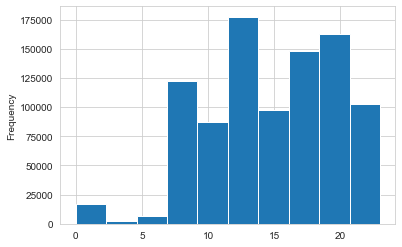

In [213]:
df['view_time_hour'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

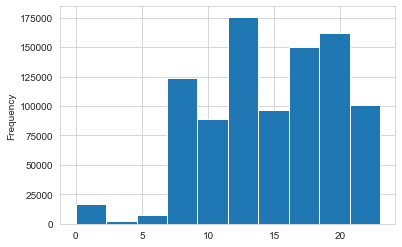

In [214]:
df['payment_time_hour'].plot(kind='hist')

As we see above, there are far less impressions during the early morning hours. So we consider 2 bins, one for the `Early Morning` and the other for the `Day Time` hours.

In [215]:
df['payment_time_hour_cat'] = pd.cut(df['payment_time_hour'] ,bins=[-1,8,24], labels=['Early Morning','Day Time'])

In [216]:
df['view_time_hour_cat'] = pd.cut(df['view_time_hour'] ,bins=[-1,8,24], labels=['Early Morning','Day Time'])

In [217]:
df

,index,payment_time_transactions,money,kind_Pay,kind_Card,network,sex,view_time,clicked,view_counts,payment_time_hour,view_time_hour,payment-to-view-seconds,payment_time_hour_cat,view_time_hour_cat
0,0,2017-08-01 00:00:01,300,4JBo,DEBIT,3g+,male,2017-08-01 00:00:20,0,1,0,0,19.0,Early Morning,Early Morning
1,1,2017-08-01 00:00:01,4825,4JBo,DEBIT,3g+,female,2017-08-01 00:00:06,0,1,0,0,5.0,Early Morning,Early Morning
2,2,2017-08-01 00:00:01,800,4JBo,DEBIT,unknown,male,2017-08-01 00:00:07,0,1,0,0,6.0,Early Morning,Early Morning
3,3,2017-08-01 00:00:01,1200,4JBo,DEBIT,unknown,male,2017-08-01 00:01:39,0,1,0,0,81.5,Early Morning,Early Morning
4,4,2017-08-01 00:00:02,4825,4JBo,DEBIT,4g,male,2017-08-01 00:00:16,0,1,0,0,14.0,Early Morning,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924373,924377,2017-08-01 23:59:59,1000,zO8g,CREDIT,unknown,male,2017-08-02 00:00:05,1,1,23,0,6.0,Day Time,Early Morning
924374,924378,2017-08-01 23:59:59,350,4JBo,DEBIT,4g,male,2017-08-02 00:00:03,0,1,23,0,4.0,Day Time,Early Morning
924375,924379,2017-08-02 00:00:00,2000,4JBo,DEBIT,4g,male,2017-08-02 00:00:03,1,1,0,0,3.0,Early Morning,Early Morning
924376,924380,2017-08-02 00:00:00,350,4JBo,CREDIT,2g,male,2017-08-02 00:00:02,0,1,0,0,2.0,Early Morning,Early Morning


## `Model Training`

In [238]:
features = ['money', 'kind_Pay', 'kind_Card','network', 'sex', 'view_counts', 'payment-to-view-seconds', 'payment_time_hour_cat', 'view_time_hour_cat']
X = pd.get_dummies(df[features], drop_first=True)
y = df['clicked']

In [239]:
X

,money,view_counts,payment-to-view-seconds,kind_Pay_zLGr,kind_Pay_zO8g,kind_Card_DEBIT,network_3g,network_3g+,network_4g,network_edge,network_unknown,network_wifi,sex_male,sex_unknown,payment_time_hour_cat_Day Time,view_time_hour_cat_Day Time
0,300,1,19.0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,4825,1,5.0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,800,1,6.0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,1200,1,81.5,0,0,1,0,0,0,0,1,0,1,0,0,0
4,4825,1,14.0,0,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924373,1000,1,6.0,0,1,0,0,0,0,0,1,0,1,0,1,0
924374,350,1,4.0,0,0,1,0,0,1,0,0,0,1,0,1,0
924375,2000,1,3.0,0,0,1,0,0,1,0,0,0,1,0,0,0
924376,350,1,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0


### OverSampling
As discussed previously, we are working on an imbalanced dataset where a small portion of our impressions lead to an actual click. Therefore, we choose to use oversampling to tackle this issue.

In [240]:
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

### Scaling
Scaling is important in the sense that we adjust the columns by their own distributions.

In [241]:
scaler = StandardScaler()
scaler.fit(X_resampled)
X_train_scaled = scaler.transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

### Model Training 

In [242]:
#model = DecisionTreeClassifier()
model = RandomForestClassifier(n_estimators=20, min_samples_leaf=2, random_state = 42)
#model = KNeighborsClassifier()
#model = SVC()
model.fit(X_train_scaled, y_resampled)

y_pred_train = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

print('train:', accuracy_score(y_resampled, y_pred_train))
print('test:', accuracy_score(y_test, y_pred))
print(classification_report(y_resampled, y_pred_train))
print(classification_report(y_test, y_pred))

train: 0.7333229974722473
test: 0.6509924765198577
              precision    recall  f1-score   support

           0       0.75      0.71      0.73    551478
           1       0.72      0.76      0.74    551478

    accuracy                           0.73   1102956
   macro avg       0.73      0.73      0.73   1102956
weighted avg       0.73      0.73      0.73   1102956

              precision    recall  f1-score   support

           0       0.91      0.68      0.77    271532
           1       0.15      0.46      0.22     33513

    accuracy                           0.65    305045
   macro avg       0.53      0.57      0.50    305045
weighted avg       0.83      0.65      0.71    305045



In [244]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[183307  88225]
 [ 18238  15275]]


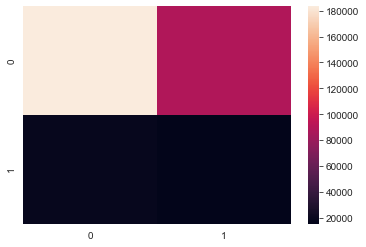

In [245]:
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

### K-fold cross validation


In [230]:
from sklearn.model_selection import cross_val_score

model =  RandomForestClassifier(n_estimators=20, min_samples_leaf=2, random_state = 42)

scores = cross_val_score(model, X_train_scaled, y_resampled, cv=5, scoring='f1')

scores

array([0.71638453, 0.71665994, 0.71552012, 0.71963416, 0.71616019])

In [231]:
scores.mean()

0.7168717873883372

### Gridsearch

In [234]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train_scaled, y_resampled)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


KeyboardInterrupt: 

### Deep Learning (ANN)

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
from keras.layers import Dropout
from keras.regularizers import l2
import keras as kp
opt = kp.optimizers.Adam(learning_rate=0.0075)

In [ ]:
ann.add(tf.keras.layers.Dense(units=27, activation='relu')) #,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))

In [ ]:
ann.add(Dropout(0.2))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = opt, loss = 'mean_squared_error')

In [ ]:
ann.fit(X_train_scaled, y_resampled, batch_size = 32, epochs = 2)

In [ ]:
y_pred_test = ann.predict(X_test_scaled)
y_pred_train = ann.predict(X_train_scaled)
y_pred_test = (y_pred_test>0.5)
y_pred_train = (y_pred_train>0.5)

In [ ]:
print ('Accuracy of model based on testing set is:', 100*accuracy_score(y_test, y_pred_test))
print ('Accuracy of model based on training set is:', 100*accuracy_score(y_resampled, y_pred_train))

Accuracy of model based on testing set is: 55.7239095871101
Accuracy of model based on training set is: 61.047040861104165